In [1]:

try:
  import pickle5 as pickle
except:
  !pip install pickle5
  import pickle5 as pickle
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, GlobalMaxPooling1D
from keras.layers import Conv1D, MaxPooling1D, Embedding, Concatenate, Flatten
from keras.models import Model
from sklearn.metrics import roc_auc_score,roc_curve, auc
from numpy import random
from keras.layers import LSTM, Bidirectional, GlobalMaxPool1D, Dropout
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model

import sys
sys.path.insert(0,'/content/drive/MyDrive/ML_Data/')
import functions as f

     |████████████████████████████████| 133kB 5.9MB/s 
  Created wheel for pickle5: filename=pickle5-0.0.11-cp37-cp37m-linux_x86_64.whl size=219274 sha256=1e381fe11b14a2e8b20cd34ef9c2e4d7671e59117162e45f7c4e2abe883399bd
  Stored in directory: /root/.cache/pip/wheels/a6/90/95/f889ca4aa8b0e0c7f21c8470b6f5d6032f0390a3a141a9a3bd
Successfully built pickle5


In [2]:
def load_data(D=1,randomize=False):
    try:
        with open('/content/drive/MyDrive/ML_Data/df_train_'+str(D)+'D.pickle', 'rb') as handle:
            df_train = pickle.load(handle)
    except:
        df_train = pd.read_pickle("C:/Users/nik00/py/proj/hyppi-train.pkl")
    try:
        with open('/content/drive/MyDrive/ML_Data/df_test_'+str(D)+'D.pickle', 'rb') as handle:
            df_test = pickle.load(handle)
    except:
        df_test = pd.read_pickle("C:/Users/nik00/py/proj/hyppi-independent.pkl")
    if randomize:
        return shuff_together(df_train,df_test)
    else:
        return df_train,df_test

df_train,df_test = load_data(4)
print('The data used will be:')
df_train[['Human','Yersinia']]

The data used will be:


,Human,Yersinia
0,"[MKDK, KDKQ, DKQK, KQKK, QKKK, KKKK, KKKE, KKE...","[MAKA, AKAS, KASR, ASRH, SRHN, RHNL, HNLS, NLS..."
1,"[MSWS, SWSG, WSGL, SGLL, GLLH, LLHG, LHGL, HGL...","[MQHV, QHVT, HVTG, VTGS, TGSK, GSKR, SKRR, KRR..."
2,"[MSLF, SLFD, LFDL, FDLF, DLFR, LFRG, FRGF, RGF...","[MAEL, AELP, ELPA, LPAK, PAKR, AKRR, KRRF, RRF..."
3,"[MAVA, AVAP, VAPR, APRL, PRLF, RLFG, LFGG, FGG...","[MRIF, RIFA, IFAI, FAIS, AISC, ISCS, SCSS, CSS..."
4,"[MSTI, STIQ, TIQS, IQSE, QSET, SETD, ETDC, TDC...","[MSYA, SYAF, YAFP, AFPG, FPGT, PGTF, GTFP, TFP..."
...,...,...
6265,"[MSYF, SYFG, YFGE, FGEH, GEHF, EHFW, HFWG, FWG...","[MITT, ITTD, TTDG, TDGN, DGNS, GNSA, NSAV, SAV..."
6266,"[MTVG, TVGK, VGKS, GKSS, KSSK, SSKM, SKML, KML...","[MSQP, SQPP, QPPF, PPFW, PFWQ, FWQQ, WQQK, QQK..."
6267,"[MNNL, NNLS, NLSF, LSFS, SFSE, FSEL, SELC, ELC...","[MSED, SEDR, EDRH, DRHQ, RHQQ, HQQR, QQRQ, QRQ..."
6268,"[MAPE, APEI, PEIN, EINL, INLP, NLPG, LPGP, PGP...","[MKNL, KNLS, NLSF, LSFV, SFVA, FVAG, VAGL, AGL..."


Median length of Joined sequence is 875


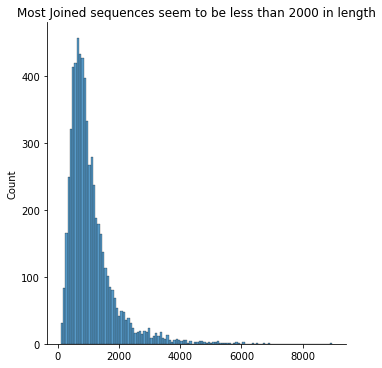

In [ ]:
rows = df_train['Joined'].shape[0]
lengths = sorted(len(s) for s in df_train['Joined'])
print("Median length of Joined sequence is",lengths[len(lengths)//2])
_  = f.sns.displot(lengths)
_=plt.title("Most Joined sequences seem to be less than 2000 in length")

In [3]:
data_4D_join_pre,data_test_4D_join_pre,num_words_4D_join,MAX_SEQUENCE_LENGTH_4D,MAX_VOCAB_SIZE_4D = f.get_seq_data_join(100000,1000,df_train,df_test,pad='pre')

MAX_VOCAB_SIZE is 100000
MAX_SEQUENCE_LENGTH is 1000
max sequence_data length: 8192
min sequence_data length: 89
median sequence_data length: 805
max word index: 99999
Found 157062 unique tokens.
pre padding.
Shape of data tensor: (6270, 1000)
max sequences_test length: 5586
min sequences_test length: 115
median sequences_test length: 825
pre padding for test seq.
Shape of data_test tensor: (1514, 1000)
num_words is 100000


In [4]:
data_4D_join_center,data_test_4D_join_center,num_words_4D_join,MAX_SEQUENCE_LENGTH_4D,MAX_VOCAB_SIZE_4D = f.get_seq_data_join(100000,1000,df_train,df_test,pad='center')

MAX_VOCAB_SIZE is 100000
MAX_SEQUENCE_LENGTH is 1000
max sequence_data length: 8192
min sequence_data length: 89
median sequence_data length: 805
max word index: 99999
Found 157062 unique tokens.
Center padding.
Shape of data tensor: (6270, 1000)
max sequences_test length: 5586
min sequences_test length: 115
median sequences_test length: 825
Center padding for test seq.
Shape of data_test tensor: (1514, 1000)
num_words is 100000


In [5]:
data_4D_join_post,data_test_4D_join_post,num_words_4D_join,MAX_SEQUENCE_LENGTH_4D,MAX_VOCAB_SIZE_4D = f.get_seq_data_join(100000,1000,df_train,df_test,pad='post')

MAX_VOCAB_SIZE is 100000
MAX_SEQUENCE_LENGTH is 1000
max sequence_data length: 8192
min sequence_data length: 89
median sequence_data length: 805
max word index: 99999
Found 157062 unique tokens.
post padding.
Shape of data tensor: (6270, 1000)
max sequences_test length: 5586
min sequences_test length: 115
median sequences_test length: 825
post padding for test seq.
Shape of data_test tensor: (1514, 1000)
num_words is 100000


In [8]:
EMBEDDING_DIM_4D = 5
VALIDATION_SPLIT = 0.2
BATCH_SIZE = 128
EPOCHS = 10
DROP = 0.6
x1 = f.conv_model(MAX_SEQUENCE_LENGTH_4D,EMBEDDING_DIM_4D,num_words_4D_join,DROP)
x2 = f.conv_model(MAX_SEQUENCE_LENGTH_4D,EMBEDDING_DIM_4D,num_words_4D_join,DROP)
x3 = f.conv_model(MAX_SEQUENCE_LENGTH_4D,EMBEDDING_DIM_4D,num_words_4D_join,DROP)
concatenator = Concatenate(axis=1)
x = concatenator([x1.output, x2.output, x3.output])
x = Dense(128)(x)
x = Dropout(DROP)(x)
output = Dense(1, activation="sigmoid",name="Final")(x)
model4D_CNN_join = Model(inputs=[x1.input, x2.input, x3.input], outputs=output)

model4D_CNN_join.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

trains = [data_4D_join_pre,data_4D_join_center,data_4D_join_post]
tests = [data_test_4D_join_pre,data_test_4D_join_center,data_test_4D_join_post]

model4D_CNN_join.fit(trains, df_train['label'].values, epochs=EPOCHS,batch_size=BATCH_SIZE, validation_data=(tests,df_test['label'].values))
print(roc_auc_score(df_test['label'].values, model4D_CNN_join.predict(tests)))

Epoch 1/10
49/49 [==============================] - 4s 67ms/step - loss: 0.6584 - accuracy: 0.6063 - val_loss: 0.6229 - val_accuracy: 0.6797
Epoch 2/10
49/49 [==============================] - 3s 55ms/step - loss: 0.5791 - accuracy: 0.6886 - val_loss: 0.5385 - val_accuracy: 0.7107
Epoch 3/10
49/49 [==============================] - 3s 57ms/step - loss: 0.2772 - accuracy: 0.8920 - val_loss: 0.4514 - val_accuracy: 0.8038
Epoch 4/10
49/49 [==============================] - 3s 56ms/step - loss: 0.0890 - accuracy: 0.9680 - val_loss: 0.5211 - val_accuracy: 0.7913
Epoch 5/10
49/49 [==============================] - 3s 54ms/step - loss: 0.0325 - accuracy: 0.9908 - val_loss: 0.5910 - val_accuracy: 0.7926
Epoch 6/10
49/49 [==============================] - 3s 56ms/step - loss: 0.0193 - accuracy: 0.9951 - val_loss: 0.6153 - val_accuracy: 0.7985
Epoch 7/10
49/49 [==============================] - 3s 54ms/step - loss: 0.0165 - accuracy: 0.9961 - val_loss: 0.6472 - val_accuracy: 0.8052
Epoch 8/10
49

In [ ]:
#model4D_join.save('/content/drive/MyDrive/ML_Data/model4D_join.h5')